<a href="https://colab.research.google.com/github/KJM94/pym/blob/main/src/april_tps_starter_with_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!echo '{}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c tabular-playground-series-apr-2021

  0% 0.00/879k [00:00<?, ?B/s]
100% 879k/879k [00:00<00:00, 49.9MB/s]
  0% 0.00/2.07M [00:00<?, ?B/s]
100% 2.07M/2.07M [00:00<00:00, 136MB/s]
  0% 0.00/2.13M [00:00<?, ?B/s]
100% 2.13M/2.13M [00:00<00:00, 18.9MB/s]


In [ ]:
!ls

sample_data  sample_submission.csv  test.csv.zip  train.csv.zip


In [ ]:
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 15.6MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 245kB 36.8MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 6.8MB 46.1MB/s 
     |████████████████████████████████| 2.0MB 33.6MB/s 
     |████████████████████████████████| 276kB 44.6MB/s 
     |████████████████████████████████| 1.7MB 42.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 14.2MB 41.1MB/s 
     |████████████████████████████████| 215kB 48.2MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 3.2MB 43.0MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
 

In [ ]:
!pip install optuna-dashboard

     |████████████████████████████████| 1.2MB 16.6MB/s 
     |████████████████████████████████| 92kB 9.0MB/s 
     |████████████████████████████████| 296kB 44.0MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 143kB 42.6MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 112kB 39.2MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=04f4cfc3646c7ff71612a90762f0ac9f671cfd70422fdc034f35c1a1fe35ed24
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 55kB/s 


In [ ]:
import pandas as pd 
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


In [ ]:
%matplotlib inline
sns.set(color_codes=True)
pal = sns.color_palette("Set2", 10)
sns.set_palette(pal)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


## Mostly data is fully available, in some columns there is only 5-7% of data missing, only in the Cabin column theres arounfd 70% data missing so we should drop that column

Dropping **Cabin**

In [ ]:
train = train.drop(['Cabin'],axis=1)
test = test.drop(['Cabin'],axis=1)

train.shape, test.shape

((100000, 11), (100000, 10))

## Sex-Survived Comparison

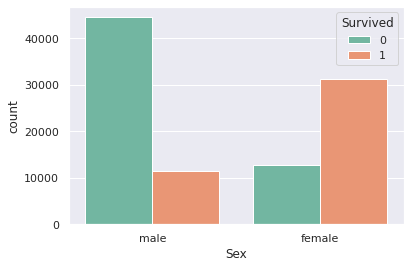

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=train)

## Handling Missing values for
1. Age
2. Ticket
3. Fare
4. Embarked

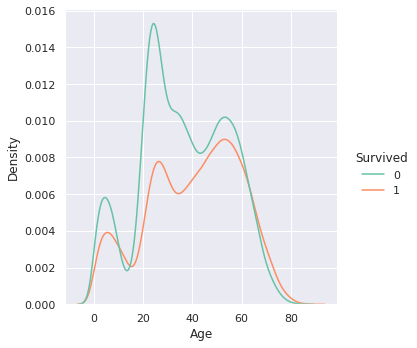

In [ ]:
##Age
sns.displot(train, x="Age", kind="kde",hue='Survived')

Text(0.5, 0, 'Age')

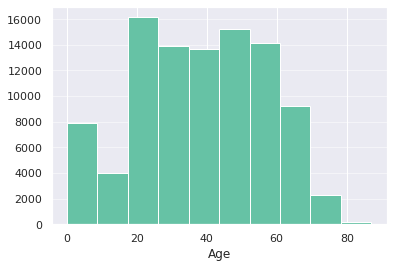

In [ ]:
plt.hist(x=train.Age, bins=10)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Age')

In [ ]:
print('For Missing Values')
print('Total no. of observations:', train[train['Age'].isnull()].shape[0])
a = train[train['Age'].isnull()].groupby('Survived').Survived.count()
b =  pd.DataFrame({'Survived': a.index, '%age':a.values*100/a.values.sum()})
print(b.to_string(index=False))

For Missing Values
Total no. of observations: 3292
 Survived       %age
        0  58.809235
        1  41.190765


In [ ]:
mu=int(train['Age'].mean())
print('For mean')
print('Total no. of observations:', train[train['Age']==mu].shape[0])
a = train[train['Age']==mu].groupby('Survived').Survived.count()
b =  pd.DataFrame({'Survived': a.index, '%age':a.values*100/a.values.sum()})
print(b.to_string(index=False))

For mean
Total no. of observations: 1547
 Survived       %age
        0  59.534583
        1  40.465417


### Distribution matches with mean

In [ ]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(train['Age'].mean(),inplace=True)

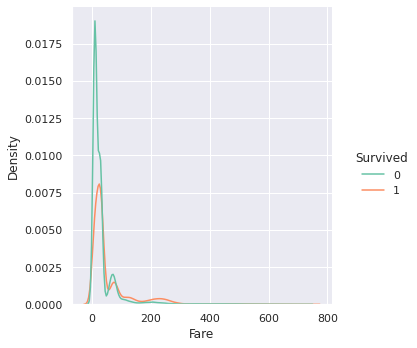

In [ ]:
##Ticket
sns.displot(train, x="Fare", kind="kde",hue='Survived')

### A very imbalanced distribution in which we can see high fare passengers survived more than others

In [ ]:
train.groupby('Pclass').Fare.mean()

Pclass
1    92.653113
2    25.756003
3    20.618226
Name: Fare, dtype: float64

### As we can see Fare is corelated to the Pclass so we can impute accordingly

In [ ]:
c1 = 92.65
c2 = 25.76
c3 = 20.62
l=[]
s=set(train['Fare'])
for i in range(train['Fare'].shape[0]):
    if train['Fare'][i] not in s:
        if train['Pclass'][i]==1:
            l.append(c1)
        elif train['Pclass'][i]==2:
            l.append(c2)
        else:
            l.append(c3)
    else:
        l.append(train['Fare'][i])
        
train['Fare'] = l

l=[]
s=set(test['Fare'])
for i in range(test['Fare'].shape[0]):
    if test['Fare'][i] not in s:
        if test['Pclass'][i]==1:
            l.append(c1)
        elif test['Pclass'][i]==2:
            l.append(c2)
        else:
            l.append(c3)
    else:
        l.append(test['Fare'][i])
        
test['Fare'] = l

In [ ]:
##Ticket
train.groupby('Ticket').Ticket.count().sort_values(ascending=False).head(20)


Ticket
A/5            602
C.A.           177
SC/PARIS       145
SOTON/O.Q.      80
SC              57
W./C.           53
A/5.            40
W.E.P.          23
CA              22
STON/O2.        21
PP              15
CA.             15
A/4             12
LP              12
SOTON/OQ        11
S.P.            10
9566            10
PC               9
12736            9
S.O.C.           9
Name: Ticket, dtype: int64

In [ ]:
train.groupby(['Ticket','Survived']).Survived.count().sort_values(ascending=False).head(20)

Ticket       Survived
A/5          0           383
             1           219
C.A.         0           108
SC/PARIS     0            80
C.A.         1            69
SC/PARIS     1            65
SOTON/O.Q.   0            53
SC           0            29
             1            28
SOTON/O.Q.   1            27
W./C.        0            27
             1            26
A/5.         0            26
             1            14
CA           0            14
STON/O2.     0            12
W.E.P.       1            12
CA.          0            11
LP           0            11
W.E.P.       0            11
Name: Survived, dtype: int64

In [ ]:
train['Ticket'] = train['Ticket'].str.replace('[^a-zA-Z]', 'r').str[:1]

test['Ticket'] = test['Ticket'].str.replace('[^a-zA-Z]', 'r').str[:1]

In [ ]:
train['Ticket'].fillna('Random',inplace=True)
l=[]
for i in train['Ticket']:
    if i == 'r':
        l.append('Random')
    else:
        l.append(i)
        
train['Ticket'] = l


test['Ticket'].fillna('Random',inplace=True)
l=[]
for i in test['Ticket']:
    if i == 'r':
        l.append('Random')
    else:
        l.append(i)
        
test['Ticket'] = l


In [ ]:
train.groupby('Ticket').Ticket.count().sort_values(ascending=False).head(20)

Ticket
Random    75345
P          7146
S          6532
A          6234
C          2705
W          1055
F           927
L            56
Name: Ticket, dtype: int64

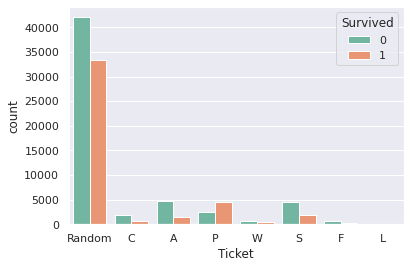

In [ ]:
sns.countplot(x='Ticket',hue='Survived',data=train)

In [ ]:
#Embarked
train.groupby('Embarked').Embarked.count()

Embarked
C    22187
Q     5424
S    72139
Name: Embarked, dtype: int64

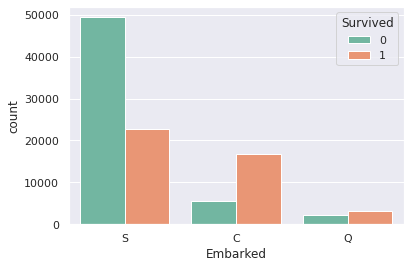

In [ ]:
sns.countplot(x='Embarked',hue='Survived',data=train)

In [ ]:
train.groupby(['Embarked','Survived']).Survived.count()

Embarked  Survived
C         0            5518
          1           16669
Q         0            2186
          1            3238
S         0           49394
          1           22745
Name: Survived, dtype: int64

In [ ]:
train[train['Embarked'].isnull()].groupby('Survived').Survived.count()

Survived
0    128
1    122
Name: Survived, dtype: int64

### Here we have two options to impute the mode that is **S** or impute the category which has most equal ratio as survived that is **Q** So we can do trial and error

In [ ]:
# imputing Q
l=[]
for i in train['Embarked']:
    if i in[np.nan]:
        l.append('S')
    else:
        l.append(i)

train['Embarked']=l

l=[]
for i in test['Embarked']:
    if i in[np.nan]:
        l.append('S')
    else:
        l.append(i)

test['Embarked']=l

## Every missing value has been handled

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train['LastName'] = train['Name'].str.split(', ').str[0:1]
test['LastName'] = test['Name'].str.split(', ').str[0:1]

In [ ]:
l=[]
for i in train['LastName']:
    
    l.append(i[0])
    
train['LastName'] = l


l=[]
for i in test['LastName']:
    l.append(i[0])
    
test['LastName'] = l

In [ ]:
df = train.groupby('LastName').Survived.agg(['count','mean']).sort_values(by='count',ascending=False)
df = df.reset_index()
df.head(20)


,LastName,count,mean
0,Smith,1162,0.435456
1,Johnson,950,0.424211
2,Williams,733,0.410641
3,Jones,681,0.439060
4,Brown,665,0.433083
5,Davis,519,0.420039
6,Miller,427,0.449649
7,Thomas,374,0.401070
8,Wilson,371,0.431267
9,Moore,363,0.407713


In [ ]:
df2 = test.groupby('LastName').LastName.agg(['count']).sort_values(by='count',ascending=False)
df2 = df2.reset_index()
df2.head(20)


,LastName,count
0,Smith,1143
1,Johnson,867
2,Williams,755
3,Brown,687
4,Jones,651
5,Davis,546
6,Miller,478
7,Wilson,419
8,Moore,379
9,Anderson,370


In [ ]:
d = {}
for i in range(df.shape[0]):
    d[df['LastName'][i]] = df['count'][i]

for i in range (df2.shape[0]):
    if df2['LastName'][i] not in d.keys():
        d[df2['LastName'][i]] = 0
    d[df2['LastName'][i]] += df2['count'][i]

In [ ]:
l=[]
for i in train['LastName']:
    if(d[i]>=10):
        l.append(i)
    else:
        l.append('RandomSurname')
    
train['LastName'] = l


l=[]
for i in test['LastName']:
    if(d[i]>=5):
        l.append(i)
    else:
        l.append('RandomSurname')
    
test['LastName'] = l

In [ ]:
## Encoding CATEGORICAL variables Sex, Embarked
le =LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])
train['Ticket'] = le.fit_transform(train['Ticket'])
test['Ticket'] = le.transform(test['Ticket'])
le.fit(list(train['LastName'])+list(test['LastName']))
train['LastName']=le.transform(train['LastName'])
test['LastName'] = le.transform(test['LastName'])


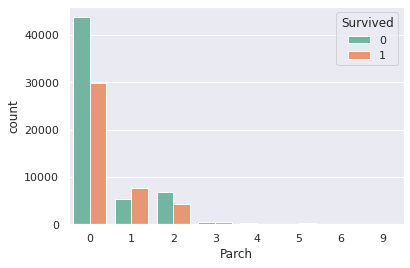

In [ ]:
sns.countplot(x='Parch',hue='Survived',data=train)

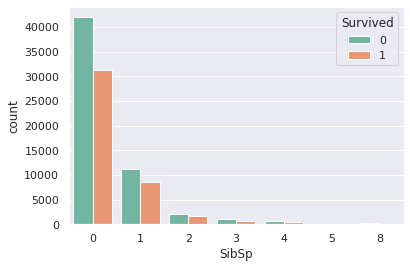

In [ ]:
sns.countplot(x='SibSp',hue='Survived',data=train)

### We can make another feature corelating with both Parch and Sibsp

In [ ]:
train['FamOnBoard'] = train['Parch']+train['SibSp']
test['FamOnBoard'] = test['Parch']+test['SibSp']
l=[]
l2=[]
for i in train['FamOnBoard']:
    if i ==0:
        l.append(1)
    else:
        l.append(0)
    if i>=3:
        l2.append(1)
    else:
        l2.append(0)

train['Alone'] = l
train['BigFam'] = l2



l=[]
l2=[]
for i in test['FamOnBoard']:
    if i ==0:
        l.append(1)
    else:
        l.append(0)
    if i>=3:
        l2.append(1)
    else:
        l2.append(0)

test['Alone'] = l
test['BigFam'] = l2

In [ ]:
X = train.drop(['PassengerId','Survived','Name'],axis=1)
X_test = test.drop(['PassengerId','Name'],axis=1)   
y = train['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FamOnBoard,Alone,BigFam
0,1,1,38.355472,2,0,5,27.14,2,4912,2,0,0
1,3,1,38.355472,0,0,5,13.35,2,896,0,1,0
2,3,1,0.330000,1,2,1,71.29,2,5002,3,0,1
3,3,1,19.000000,0,0,0,13.04,2,3655,0,1,0
4,3,1,25.000000,0,0,5,7.76,2,670,0,1,0


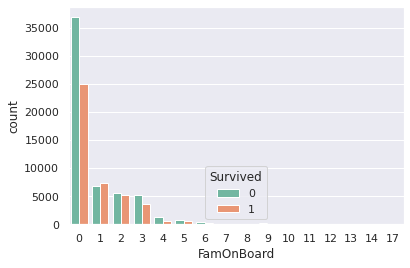

In [ ]:
sns.countplot(x='FamOnBoard',hue='Survived',data=train)

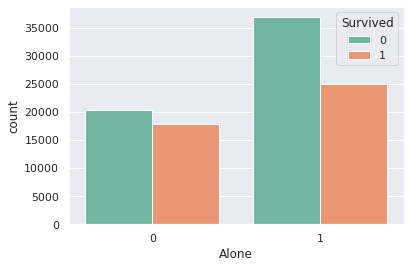

In [ ]:
sns.countplot(x='Alone',hue='Survived',data=train)

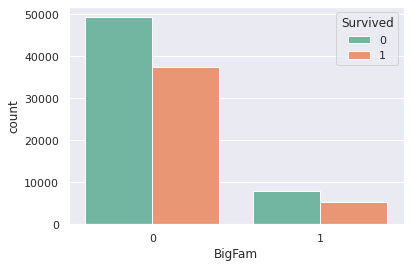

In [ ]:
sns.countplot(x='BigFam',hue='Survived',data=train)

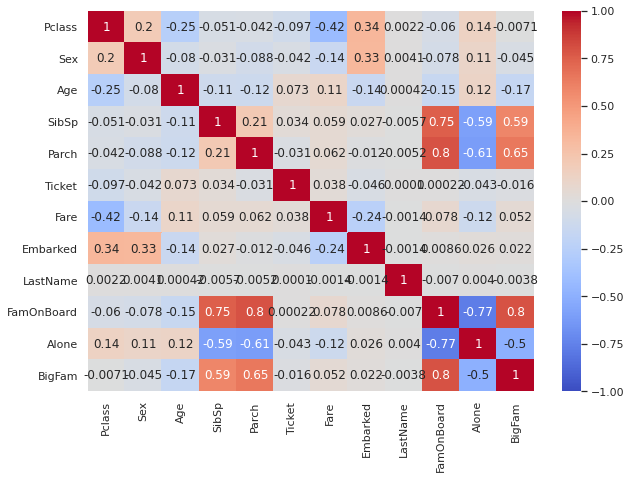

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2,random_state=42)

# Model Selection using Pycaret 🥕  

## Comparing baselines

In [ ]:
from pycaret.classification import *
clf1 = setup(data=train.drop(['PassengerId','Name'],axis=1), target='Survived',silent=True,train_size=0.8, imputation_type='simple')

,Description,Value
0,session_id,2741
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(100000, 13)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models()

In [ ]:
compare_models()

## Creating and Tuning Top 3 models

In [ ]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7698,0.8413,0.7360,0.7270,0.7315,0.5300,0.5300
1,0.7764,0.8464,0.7512,0.7313,0.7411,0.5444,0.5445
2,0.7801,0.8523,0.7495,0.7384,0.7439,0.5513,0.5513
3,0.7762,0.8449,0.7378,0.7373,0.7375,0.5425,0.5425
4,0.7706,0.8431,0.7357,0.7286,0.7322,0.5316,0.5316
5,0.7716,0.8426,0.7308,0.7327,0.7318,0.5329,0.5329
6,0.7721,0.8464,0.7378,0.7303,0.7341,0.5347,0.5347
7,0.7780,0.8465,0.7478,0.7357,0.7417,0.5471,0.5471
8,0.7819,0.8510,0.7475,0.7425,0.7450,0.5544,0.5544
9,0.7739,0.8445,0.7381,0.7332,0.7356,0.5381,0.5381


In [ ]:
FOLD = 2

In [ ]:
tuned_lgbm = tune_model(lgbm, fold = FOLD)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7729,0.8439,0.7378,0.7316,0.7347,0.5362,0.5363
1,0.7740,0.8437,0.7343,0.7351,0.7347,0.5378,0.5378
Mean,0.7734,0.8438,0.7361,0.7333,0.7347,0.5370,0.5370
SD,0.0005,0.0001,0.0018,0.0017,0.0000,0.0008,0.0008


In [ ]:
cb = create_model('catboost',fold=FOLD)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7718,0.8425,0.7347,0.7312,0.7330,0.5338,0.5338
1,0.7736,0.8432,0.7357,0.7337,0.7347,0.5372,0.5372
Mean,0.7727,0.8429,0.7352,0.7325,0.7338,0.5355,0.5355
SD,0.0008,0.0003,0.0005,0.0012,0.0009,0.0017,0.0017


In [ ]:
tuned_cb = tune_model(cb,fold=FOLD)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7744,0.8445,0.7404,0.733,0.7366,0.5393,0.5394
1,0.7756,0.8451,0.7404,0.735,0.7377,0.5417,0.5417
Mean,0.7750,0.8448,0.7404,0.734,0.7372,0.5405,0.5405
SD,0.0006,0.0003,0.0000,0.001,0.0005,0.0012,0.0012


In [ ]:
gbc = create_model('gbc',fold=FOLD)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7727,0.8443,0.7545,0.7238,0.7388,0.5377,0.5381
1,0.7744,0.8444,0.7506,0.7284,0.7394,0.5407,0.5408
Mean,0.7736,0.8443,0.7526,0.7261,0.7391,0.5392,0.5395
SD,0.0009,0.0000,0.0019,0.0023,0.0003,0.0015,0.0014


In [ ]:
tuned_gbc = tune_model(gbc,fold=FOLD)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7678,0.8348,0.6929,0.7446,0.7178,0.5210,0.5220
1,0.7712,0.8367,0.7288,0.7329,0.7308,0.5319,0.5319
Mean,0.7695,0.8357,0.7108,0.7387,0.7243,0.5264,0.5269
SD,0.0017,0.0009,0.0179,0.0058,0.0065,0.0054,0.0049


## Blending

In [ ]:
blender = blend_models(estimator_list = [tuned_lgbm,tuned_cb], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7704,0.8419,0.7380,0.7272,0.7326,0.5314,0.5314
1,0.7755,0.8464,0.7507,0.7301,0.7402,0.5426,0.5428
2,0.7821,0.8535,0.7510,0.7412,0.7460,0.5553,0.5553
3,0.7786,0.8465,0.7424,0.7392,0.7408,0.5476,0.5476
4,0.7699,0.8433,0.7339,0.7282,0.7310,0.5300,0.5300
5,0.7732,0.8423,0.7311,0.7354,0.7332,0.5361,0.5361
6,0.7740,0.8459,0.7428,0.7312,0.7370,0.5389,0.5389
7,0.7778,0.8466,0.7507,0.7339,0.7422,0.5469,0.5471
8,0.7836,0.8515,0.7516,0.7435,0.7476,0.5582,0.5583
9,0.7734,0.8454,0.7408,0.7311,0.7359,0.5375,0.5375


## Stacking

In [ ]:
stacker = stack_models(estimator_list = [tuned_lgbm,tuned_cb,tuned_gbc], meta_model=tuned_lgbm)

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:23:10
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


KeyboardInterrupt: ignored

## Making Predictions

### Individual model predictions

In [ ]:
X_test.shape

In [ ]:
preds = tuned_lgbm.predict(X_test)
preds.head()

In [ ]:
df = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predict_model(tuned_lgbm, X_test)['Label']})
df.to_csv('submit.csv',index=False)

In [ ]:
df2 = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predict_model(tuned_cb, X_test)['Label']})
df2.to_csv('submit2.csv',index=False)

In [ ]:
df3 = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predict_model(tuned_gbc, X_test)['Label']})
df.to_csv('submit3.csv',index=False)

### Blender Model Predictions

In [ ]:
df4 =pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predict_model(blender, X_test)['Label']})
df.to_csv('submit4.csv',index=False)

### Stacker Model Predictions

In [ ]:
df5 = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predict_model(stacker, X_test)['Label']})
df.to_csv('submit5.csv',index=False)

CatBoostError: ignored